<a href="https://colab.research.google.com/github/kanhaz-spec/MACHINE-LEARNING/blob/main/_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.metrics import mean_squared_error

In [6]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
file_path ='/content/drive/MyDrive/Machine Learning/headbrain.csv'

In [15]:
df=pd.read_csv(file_path)

In [16]:
print(df.head())

   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [17]:
x = df["Head Size(cm^3)"].values

In [18]:
y = df["Brain Weight(grams)"].values

In [19]:

x = np.array(x)
y = np.array(y)


In [20]:
mean_x=np.mean(x)
mean_y=np.mean(y)

In [21]:
n = len(x)
xy = x * y
x2 = x * x


In [22]:
w1 = (np.sum(xy) - n * mean_x * mean_y) / (np.sum(x2) - n * mean_x**2)

In [23]:
w0=mean_y-w1*mean_x

In [24]:
print(f"Manual Calculation -> w0 (Intercept): {w0}, w1 (Slope): {w1}")

Manual Calculation -> w0 (Intercept): 325.5734210494537, w1 (Slope): 0.2634293394893963


In [25]:
def predict(x):
    return w0 + w1 * x


In [26]:
y_pred = predict(x)


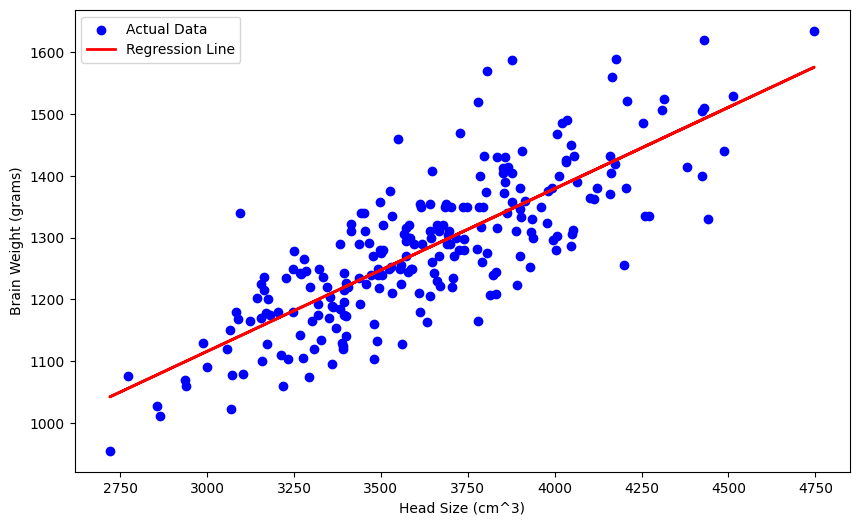

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(x, y, color="blue", label="Actual Data")
plt.plot(x, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Head Size (cm^3)")
plt.ylabel("Brain Weight (grams)")
plt.legend()
plt.show()

In [28]:
mse_manual = np.mean((y - y_pred) ** 2)
print(f"MSE (Manual Least Squares): {mse_manual}")


MSE (Manual Least Squares): 5201.3840280023305


In [29]:
x_reshaped = x.reshape(-1,1)
model = LinearRegression()
model.fit(x_reshaped, y)

w0_sklearn = model.intercept_
w1_sklearn = model.coef_[0]

print("\nScikit-Learn Linear Regression coefficients:")
print(f"w0 (Intercept) = {w0_sklearn}")
print(f"w1 (Slope)     = {w1_sklearn}")


Scikit-Learn Linear Regression coefficients:
w0 (Intercept) = 325.5734210494426
w1 (Slope)     = 0.26342933948939934


In [30]:
y_pred_sklearn = model.predict(x_reshaped)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
print(f"MSE (Scikit-Learn): {mse_sklearn}")

MSE (Scikit-Learn): 5201.3840280023305


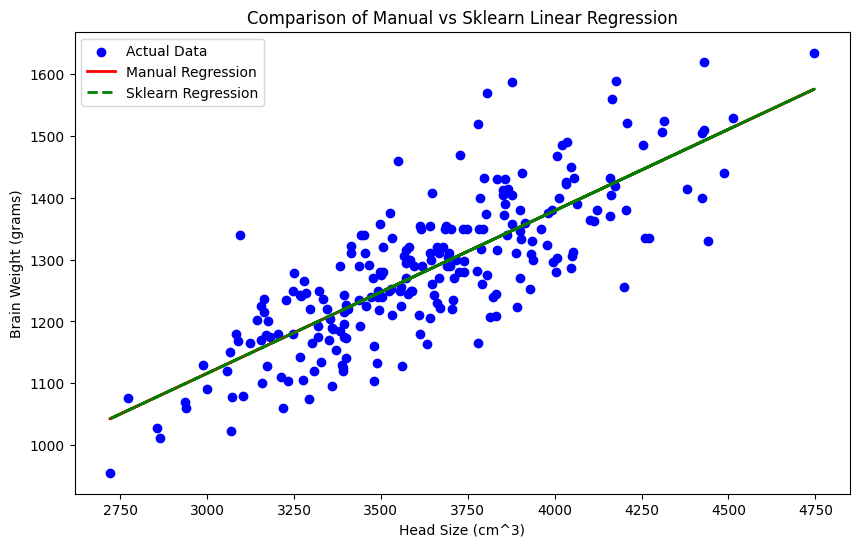

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(x, y, color="blue", label="Actual Data")
plt.plot(x, y_pred, color="red", linewidth=2, label="Manual Regression")
plt.plot(x, y_pred_sklearn, color="green", linestyle="--", linewidth=2, label="Sklearn Regression")
plt.xlabel("Head Size (cm^3)")
plt.ylabel("Brain Weight (grams)")
plt.title("Comparison of Manual vs Sklearn Linear Regression")
plt.legend()
plt.show()